## Context
This is one of the dataset provided by the National Cardiovascular Disease Surveillance System.

The system is designed to integrate multiple indicators from many data sources to provide a comprehensive picture of the public health burden of CVDs and associated risk factors in the United States.

## Content
The data are organized by location (national, regional, state, and selected sites) and indicator, and they include CVDs (e.g., heart failure) and risk factors (e.g., hypertension). The data can be plotted as trends and stratified by age group, sex, and race/ethnicity.

2011 to present. BRFSS is a continuous, state-based surveillance system that collects information about modifiable risk factors for chronic diseases and other leading causes of death.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/dataset.csv')

In [3]:
df.head()

,Year,LocationAbbr,LocationDesc,Datasource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_out,CategoryID,TopicID,IndicatorID,Data_Value_TypeID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation
0,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Overall,Overall,C1,T1,BR001,AgeStdz,BOC01,OVR01,1,"(32.84057112200048, -86.63186076199969)"
1,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Overall,Overall,C1,T1,BR001,Crude,BOC01,OVR01,1,"(32.84057112200048, -86.63186076199969)"
2,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Gender,Male,C1,T1,BR001,Crude,BOC02,GEN01,1,"(32.84057112200048, -86.63186076199969)"
3,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Gender,Male,C1,T1,BR001,AgeStdz,BOC02,GEN01,1,"(32.84057112200048, -86.63186076199969)"
4,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Gender,Female,C1,T1,BR001,AgeStdz,BOC02,GEN02,1,"(32.84057112200048, -86.63186076199969)"


In [4]:
# taking a look at the middle to end column values - since was hidden in previous output
df.iloc[:,9:].head()

,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Confidence_Limit_Low,Confidence_Limit_High,Break_Out_Category,Break_out,CategoryID,TopicID,IndicatorID,Data_Value_TypeID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation
0,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),9.9,9.9,NaN,NaN,9.2,10.7,Overall,Overall,C1,T1,BR001,AgeStdz,BOC01,OVR01,1,"(32.84057112200048, -86.63186076199969)"
1,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),11.0,11.0,NaN,NaN,10.2,11.9,Overall,Overall,C1,T1,BR001,Crude,BOC01,OVR01,1,"(32.84057112200048, -86.63186076199969)"
2,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,Percent (%),12.5,12.5,NaN,NaN,11.1,14.0,Gender,Male,C1,T1,BR001,Crude,BOC02,GEN01,1,"(32.84057112200048, -86.63186076199969)"
3,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),11.8,11.8,NaN,NaN,10.6,13.2,Gender,Male,C1,T1,BR001,AgeStdz,BOC02,GEN01,1,"(32.84057112200048, -86.63186076199969)"
4,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,Percent (%),8.3,8.3,NaN,NaN,7.5,9.1,Gender,Female,C1,T1,BR001,AgeStdz,BOC02,GEN02,1,"(32.84057112200048, -86.63186076199969)"


In [5]:
# looking at the unique values for the columns
df['LocationID'].unique()

array([ 1,  2,  4,  5,  6,  8,  9, 10, 58, 11, 12, 13, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55,
       56], dtype=int64)

In [6]:
# looking at the column names
df.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'Datasource', 'PriorityArea1',
       'PriorityArea2', 'PriorityArea3', 'PriorityArea4', 'Category', 'Topic',
       'Indicator', 'Data_Value_Type', 'Data_Value_Unit', 'Data_Value',
       'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Confidence_Limit_Low', 'Confidence_Limit_High', 'Break_Out_Category',
       'Break_out', 'CategoryID', 'TopicID', 'IndicatorID',
       'Data_Value_TypeID', 'BreakoutCategoryID', 'BreakOutID', 'LocationID',
       'GeoLocation'],
      dtype='object')

In [7]:
# LocationAbbr: Abbreviation of the State
# LocationDesc: Name of the State
# (drop) Datasource: Just BRFSS - can drop this since all the same
# PriorityArea1: Contains 'None' and 'Million Hearts'
# PriorityArea2: Contains 'None' and 'ABCS'
# PriorityArea3: Contains 'None' and 'Healthy People 2020'
# PriorityArea4: Contains only 'None'
# Category: Contains 'Cardiovascular Diseases' and 'Risk Factors'
# Topic: Topics of diagnosis of the person?
# Indicator: 'Prevalence of' blah blah blah with similar to topics? - have to check
# Data_Value_Type: Contains 'Age-Standardized' and 'Crude'
# Data_Value_Unit: Contains only 'Percent (%)'
# Data_Value: Numeric value (not sure what it stands for)
# Data_Value_Alt: Slight different to 'Data_Value', negative values here but 'nan' for 'Data_Value'
# Data_Value_Footnote_Symbol: Contains 'nan', '~', and '-'
# Data_Value_Footnote: Contains 'nan', 'Statistically unstable...', and 'Data not available'
# Confidence_Limit_Low: Numeric, similar to 'Data_Value'
# Confidence_Limit_High: Numeric
# Break_Out_Category: Contains 'Overall', 'Gender', 'Age', and 'Race'
# Break_out: Contains 'Overall', 'Male', 'Female', '18-24', '25-44', '45-64', '65+', '35+', '75+', 'Non-Hispanic White', 'Non-Hispanic Black', 'Non-Hispanic Asian', 'Hispanic', 'Other', and '20-24'
# CategoryID: Contains 'C1' and 'C2', not sure what it means
# TopicID: Contains T values, not sure what it means
# IndicatorID: Contains BR numbers, not sure what it means
# Data_Value_TypeID: Contains 'AgeStdz' and 'Crude' - same as 'Data_Value_Type'
# BreakoutCategoryID: Contains BOC values, not sure what it means
# BreakOutID: Abbreviation of Breakout
# LocationID: Corresponds to location
# Geolocation: Coordinates

In [8]:
df.describe()

,Year,Data_Value,Data_Value_Alt,Confidence_Limit_Low,Confidence_Limit_High,LocationID
count,85800.000000,57032.000000,85800.000000,55633.000000,55633.000000,85800.000000
mean,2013.000000,33.555527,21.780837,30.503187,36.873832,29.519231
std,1.414222,28.750550,28.712095,27.946300,29.497116,16.029502
min,2011.000000,0.100000,-2.000000,0.200000,0.600000,1.000000
25%,2012.000000,8.700000,-1.000000,7.200000,10.400000,16.750000
50%,2013.000000,26.400000,8.600000,22.300000,30.100000,29.500000
75%,2014.000000,52.400000,33.325000,44.400000,60.200000,42.500000
max,2015.000000,99.400000,99.400000,99.000000,99.700000,58.000000


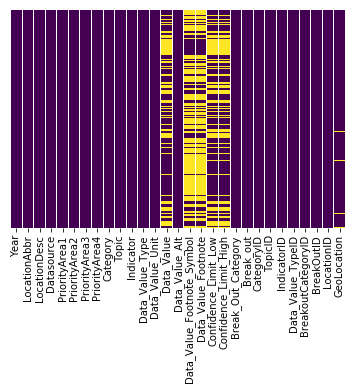

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
df.loc[df['Data_Value_Footnote_Symbol'].notnull()].head()

,Year,LocationAbbr,LocationDesc,Datasource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_out,CategoryID,TopicID,IndicatorID,Data_Value_TypeID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation
6,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Age,18-24,C1,T1,BR001,Crude,BOC03,AGE01,1,"(32.84057112200048, -86.63186076199969)"
16,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Race,Non-Hispanic Asian,C1,T1,BR001,AgeStdz,BOC04,RAC03,1,"(32.84057112200048, -86.63186076199969)"
17,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Race,Non-Hispanic Asian,C1,T1,BR001,Crude,BOC04,RAC03,1,"(32.84057112200048, -86.63186076199969)"
18,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Race,Hispanic,C1,T1,BR001,Crude,BOC04,RAC04,1,"(32.84057112200048, -86.63186076199969)"
28,2011,AK,Alaska,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Age,18-24,C1,T1,BR001,Crude,BOC03,AGE01,2,"(64.84507995700051, -147.72205903599973)"


In [11]:
df.loc[df['Data_Value_Footnote'].notnull()].head()

,Year,LocationAbbr,LocationDesc,Datasource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_out,CategoryID,TopicID,IndicatorID,Data_Value_TypeID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation
6,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Age,18-24,C1,T1,BR001,Crude,BOC03,AGE01,1,"(32.84057112200048, -86.63186076199969)"
16,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Race,Non-Hispanic Asian,C1,T1,BR001,AgeStdz,BOC04,RAC03,1,"(32.84057112200048, -86.63186076199969)"
17,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Race,Non-Hispanic Asian,C1,T1,BR001,Crude,BOC04,RAC03,1,"(32.84057112200048, -86.63186076199969)"
18,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Race,Hispanic,C1,T1,BR001,Crude,BOC04,RAC04,1,"(32.84057112200048, -86.63186076199969)"
28,2011,AK,Alaska,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Age,18-24,C1,T1,BR001,Crude,BOC03,AGE01,2,"(64.84507995700051, -147.72205903599973)"


In [12]:
# drop Datasource, Location Abbr, LocationID
# drop BreakOutID, BreakoutCategoryID
# drop CategoryID, TopicID, IndicatorID
# drop data value footnote and symbol
df.drop(['Datasource', 'LocationAbbr', 'LocationID',
          'CategoryID', 'TopicID', 'IndicatorID',
          'Data_Value_TypeID', 'BreakoutCategoryID', 'BreakOutID',
          'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
         ], axis=1, inplace=True)

In [13]:
df.replace('None', np.nan, inplace=True) # replace None values with Nan to have it show up on heatmap for better visualization

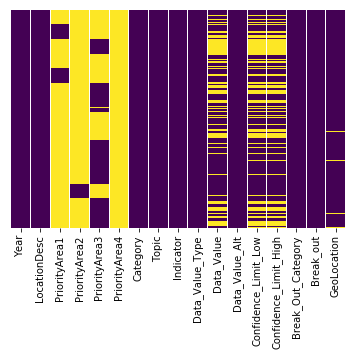

In [14]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [15]:
df['PriorityArea'] = df[['PriorityArea1', 'PriorityArea2', 'PriorityArea3', 'PriorityArea4',]].fillna('').sum(axis=1)
df.drop(['PriorityArea1', 'PriorityArea2', 'PriorityArea3', 'PriorityArea4'], axis=1, inplace=True)
df['PriorityArea'].replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [16]:
df.head()

,Year,LocationDesc,Category,Topic,Indicator,Data_Value_Type,Data_Value,Data_Value_Alt,Confidence_Limit_Low,Confidence_Limit_High,Break_Out_Category,Break_out,GeoLocation,PriorityArea
0,2011,Alabama,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,9.9,9.9,9.2,10.7,Overall,Overall,"(32.84057112200048, -86.63186076199969)",NaN
1,2011,Alabama,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,11.0,11.0,10.2,11.9,Overall,Overall,"(32.84057112200048, -86.63186076199969)",NaN
2,2011,Alabama,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,12.5,12.5,11.1,14.0,Gender,Male,"(32.84057112200048, -86.63186076199969)",NaN
3,2011,Alabama,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,11.8,11.8,10.6,13.2,Gender,Male,"(32.84057112200048, -86.63186076199969)",NaN
4,2011,Alabama,Cardiovascular Diseases,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,8.3,8.3,7.5,9.1,Gender,Female,"(32.84057112200048, -86.63186076199969)",NaN
